In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("tripadvisor_hotel_reviews.csv",nrows=1000)

In [12]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [13]:
import re
from nltk.corpus import stopwords
def clean(r):
    r=r.lower()
    r=re.sub('[^a-z A-Z 0-9-]+','',r)
    r=" ".join([word for word in r.split() if word not in stopwords.words('english')])
    return r

In [14]:
df['Review']=df['Review'].apply(clean)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms 4 experience hotel monaco seattle g...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [19]:
df['Review'][999]

'okay downstairs medicore room overrated overpriced hotel downstairs okay dimly lighted decor elevator trying european style saving energy dusting hotel floor totally different unflattering bright light grey wallsroom clean somewhat small great bed tiny tv flat screen delicious room service food bathroom looks like designer room copy 3-star hotel room valet parking ridiculous expensive 45 bucks park half block'

In [20]:
def corpus(text):
  text_list=text.split()
  return text_list

In [21]:
df['Review_lists']=df['Review'].apply(corpus)

In [22]:
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,3,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game..."


In [23]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green', smoothing=0.8):
  corpus+=df['Review_lists'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 39631.34it/s]


80921

In [24]:
from collections import Counter
mostCommon=Counter(corpus).most_common(10)
mostCommon

[('hotel', 2268),
 ('room', 1806),
 ('great', 914),
 ('stay', 892),
 ('nt', 772),
 ('staff', 684),
 ('location', 585),
 ('rooms', 583),
 ('nice', 582),
 ('good', 552)]

In [25]:
words=[]
freq=[]
for word,count in mostCommon:
    words.append(word)
    freq.append(count)

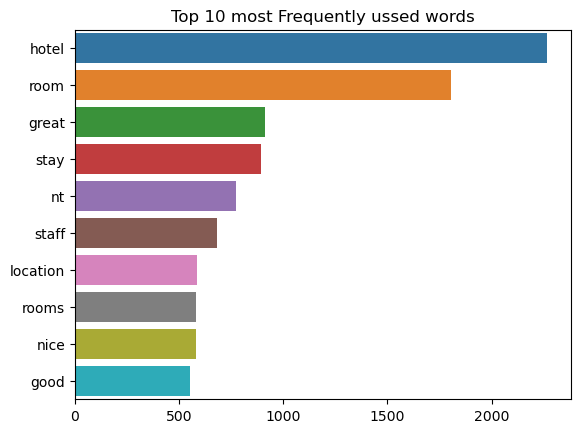

In [26]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title("Top 10 most Frequently ussed words")
plt.show()

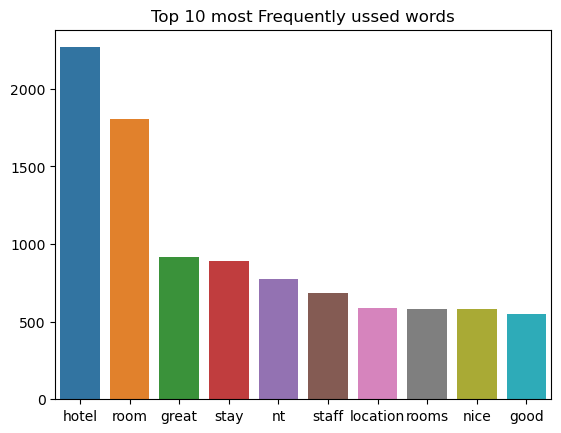

In [27]:
import seaborn as sns
sns.barplot(x=words,y=freq)
plt.title("Top 10 most Frequently ussed words")
plt.show()

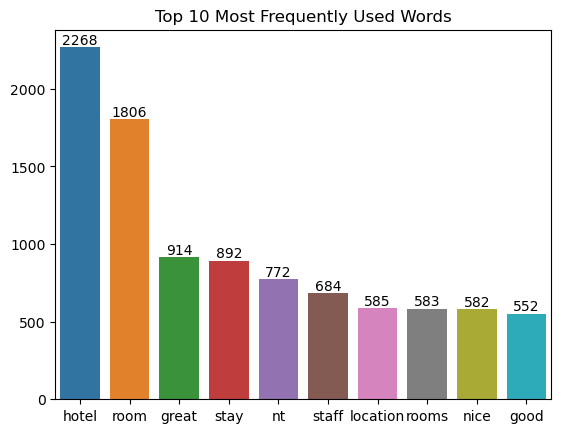

In [30]:
ax = sns.barplot(x=words, y=freq)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Top 10 Most Frequently Used Words")
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df['Review'])

In [33]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], 
                                  reverse=True))
ngram_freq.columns = ["frequency", "ngram"]



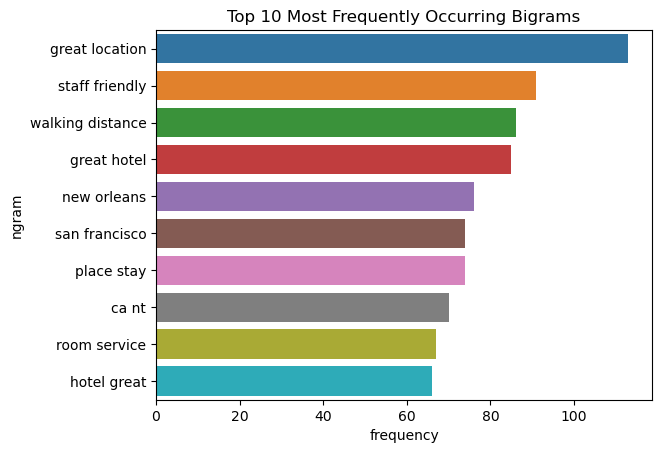

In [34]:
import seaborn as sns
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.show()


In [36]:
print(bigrams.toarray().sum())

79785
